In [1]:
#참조:https://qiskit.org/textbook/ch-demos/chsh.html
#q0= Alice
#q1=Charile
#q2,q3=Bob
#1. Alice와 Bob entanglement
#2. Charile 와 Bob entanglement
#3. Bob 이 Bell state 측정 (Entanglement swapping),(코드에서는 Bob의 측정 결과 중 (|00>+|11>)/√2만 사용했어요.)
#4. Alice와 Bob이 가진 큐빗에 대해서 CHSH-3 측정

In [2]:
#import qiskit tools
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise
import numpy as np
#import python stuff
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#IBMQ.load_account()
#provider = IBMQ.get_provider('ibm-q')
#quito = provider.get_backend('ibmq_quito')

In [4]:
sim = Aer.get_backend('aer_simulator')

In [5]:
def make_chsh_circuit_ZX(theta_vec):
    """Return a list of QuantumCircuits for use in a CHSH experiemnt
    (one for each value of theta in theta_vec)
    
        Args:
            theta_vec (list): list of values of angles between the bases of Alice and Bob
        
        Returns:
            List[QuantumCircuit]: CHSH QuantumCircuits for each value of theta
    """
    chsh_circuits = []
    
    for theta in theta_vec:
        obs_vec = ['00', '01', '10', '11']
        for el in obs_vec:
            qc = QuantumCircuit(4,4)
            qc.h(0)
            qc.h(1)
            qc.cx(0,2)
            qc.cx(1,3)
            qc.cx(2,3)
            qc.h(2)
            qc.measure(2,2)
            qc.measure(3,3)
            qc.barrier()            
            qc.ry(theta, 0)
            qc.h(0)
            for i in range(2):
                if el[i] == '1':
                    qc.h(i)
            qc.measure(range(2),range(2))
            chsh_circuits.append(qc)


    return chsh_circuits  

In [6]:
def make_chsh_circuit_ZY(theta_vec):
    """Return a list of QuantumCircuits for use in a CHSH experiemnt
    (one for each value of theta in theta_vec)
    
        Args:
            theta_vec (list): list of values of angles between the bases of Alice and Bob
        
        Returns:
            List[QuantumCircuit]: CHSH QuantumCircuits for each value of theta
    """
    chsh_circuits = []
    
    for theta in theta_vec:
        obs_vec = ['00', '01', '10', '11']
        for el in obs_vec:
            qc = QuantumCircuit(4,4)
            qc.h(0)
            qc.h(1)
            qc.cx(0,2)
            qc.cx(1,3)
            qc.cx(2,3)
            qc.h(2)
            qc.measure(2,2)
            qc.measure(3,3)
            qc.barrier()
            
            qc.rx(theta, 0)
            for i in range(2):
                if el[i] == '1':
                    qc.rx((np.pi)/2,i) 
                    qc.z(i)
            qc.measure(range(2),range(2))
            chsh_circuits.append(qc)


    return chsh_circuits 

In [7]:
def make_chsh_circuit_XY(theta_vec):
    """Return a list of QuantumCircuits for use in a CHSH experiemnt
    (one for each value of theta in theta_vec)
    
        Args:
            theta_vec (list): list of values of angles between the bases of Alice and Bob
        
        Returns:
            List[QuantumCircuit]: CHSH QuantumCircuits for each value of theta
    """
    chsh_circuits = []
    
    for theta in theta_vec:
        obs_vec = ['00', '01', '10', '11']
        for el in obs_vec:
            qc = QuantumCircuit(4,4)
            qc.h(0)
            qc.h(1)
            qc.cx(0,2)
            qc.cx(1,3)
            qc.cx(2,3)
            qc.h(2)
            qc.measure(2,2)
            qc.measure(3,3)
            qc.barrier()
            qc.rz(-theta, 0)

            for i in range(2):
                if el[i] == '1':
                    qc.y(i)
                    qc.rz((-np.pi)/2,i)
            qc.h(0)
            qc.h(1)

            qc.measure(range(2),range(2))
            chsh_circuits.append(qc)


    return chsh_circuits 

In [8]:
def compute_chsh_witnessZX(counts):
    """Computes expectation values for the CHSH inequality, for each
    angle (theta) between measurement axis.

        Args: counts (list[dict]): dict of counts for each experiment
              (4 per value of theta)

        Returns:
            Tuple(List, List): Tuple of lists with the two CHSH witnesses
    """
    # Order is ZZ,ZX,XZ,XX
    CHSH2 = []
    # Divide the list of dictionaries in sets of 4
    for i in range(0, len(counts), 4):  
        theta_dict = counts[i:i + 4]
        zz = theta_dict[0]
        zx = theta_dict[1]
        xz = theta_dict[2]
        xx = theta_dict[3]

        no_shots = sum(xx[y] for y in xx)

        chsh2 = 0

        for element in zz:
            parity = (-1)**(int(element[2])+int(element[3]))

            chsh2-= parity*zz[element]

        for element in zx:
            parity = (-1)**(int(element[2])+int(element[3]))

            chsh2+= parity*zx[element]

        for element in xz:
            parity = (-1)**(int(element[2])+int(element[3]))

            chsh2+= parity*xz[element]

        for element in xx:
            parity = (-1)**(int(element[2])+int(element[3]))

            chsh2+= parity*xx[element]

        CHSH2.append(chsh2/no_shots)
    
    return CHSH2

In [9]:
def compute_chsh_witnessZY(counts):
    """Computes expectation values for the CHSH inequality, for each
    angle (theta) between measurement axis.

        Args: counts (list[dict]): dict of counts for each experiment
              (4 per value of theta)

        Returns:
            Tuple(List, List): Tuple of lists with the two CHSH witnesses
    """
    # Order is ZZ,ZX,XZ,XX
    CHSH2 = []
    # Divide the list of dictionaries in sets of 4
    for i in range(0, len(counts), 4):  
        theta_dict = counts[i:i + 4]
        zz = theta_dict[0]
        zx = theta_dict[1]
        xz = theta_dict[2]
        xx = theta_dict[3]

        no_shots = sum(xx[y] for y in xx)

        chsh2 = 0

        for element in zz:
            parity = (-1)**(int(element[2])+int(element[3]))

            chsh2+= parity*zz[element]

        for element in zx:
            parity = (-1)**(int(element[2])+int(element[3]))

            chsh2+= parity*zx[element]

        for element in xz:
            parity = (-1)**(int(element[2])+int(element[3]))

            chsh2+= parity*xz[element]

        for element in xx:
            parity = (-1)**(int(element[2])+int(element[3]))

            chsh2-= parity*xx[element]


        CHSH2.append(chsh2/no_shots)
    
    return CHSH2

In [10]:
def compute_chsh_witnessXY(counts):
    """Computes expectation values for the CHSH inequality, for each
    angle (theta) between measurement axis.

        Args: counts (list[dict]): dict of counts for each experiment
              (4 per value of theta)

        Returns:
            Tuple(List, List): Tuple of lists with the two CHSH witnesses
    """
    # Order is ZZ,ZX,XZ,XX
    CHSH2 = []
    # Divide the list of dictionaries in sets of 4
    for i in range(0, len(counts), 4):  
        theta_dict = counts[i:i + 4]
        zz = theta_dict[0]
        zx = theta_dict[1]
        xz = theta_dict[2]
        xx = theta_dict[3]

        no_shots = sum(xx[y] for y in xx)

        chsh2 = 0

        for element in zz:
            parity = (-1)**(int(element[2])+int(element[3]))

            chsh2+= parity*zz[element]

        for element in zx:
            parity = (-1)**(int(element[2])+int(element[3]))

            chsh2+= parity*zx[element]

        for element in xz:
            parity = (-1)**(int(element[2])+int(element[3]))

            chsh2+= parity*xz[element]

        for element in xx:
            parity = (-1)**(int(element[2])+int(element[3]))

            chsh2-= parity*xx[element]


        CHSH2.append(chsh2/no_shots)
    
    return CHSH2

In [11]:
number_of_thetas = 15
theta_vec = np.linspace(0,2*np.pi,number_of_thetas)
my_chsh_circuitsZX = make_chsh_circuit_ZX(theta_vec)

In [12]:
my_chsh_circuitsZY = make_chsh_circuit_ZY(theta_vec)

In [13]:
my_chsh_circuitsXY = make_chsh_circuit_XY(theta_vec)

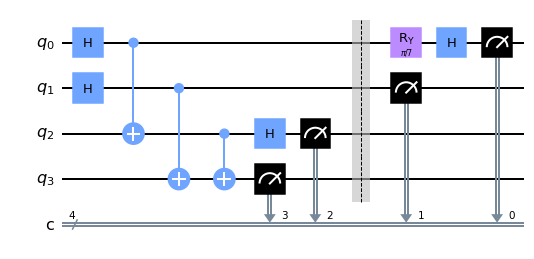

In [14]:
my_chsh_circuitsZX[4].draw(output='mpl')

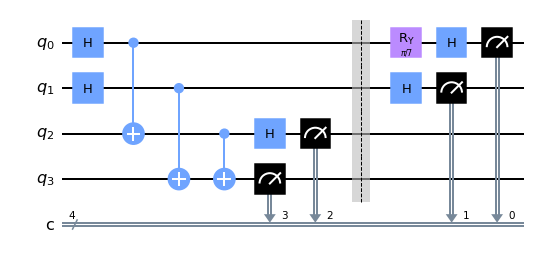

In [15]:
my_chsh_circuitsZX[5].draw(output='mpl')

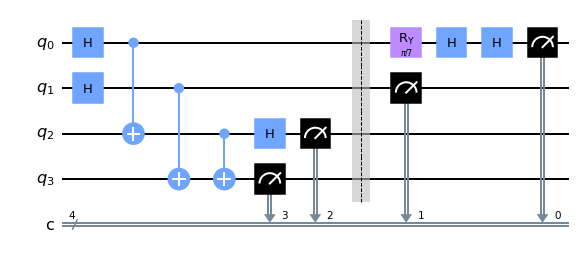

In [16]:
my_chsh_circuitsZX[6].draw(output='mpl')

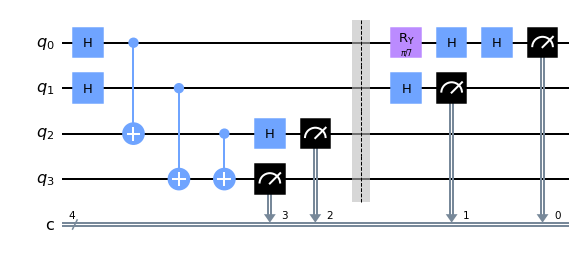

In [17]:
my_chsh_circuitsZX[7].draw(output='mpl')

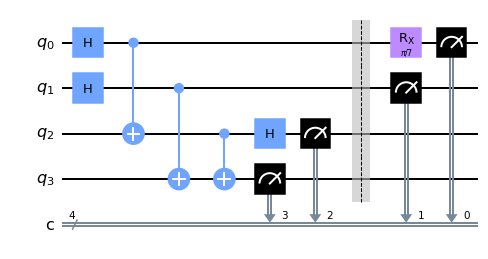

In [18]:
my_chsh_circuitsZY[4].draw(output='mpl')

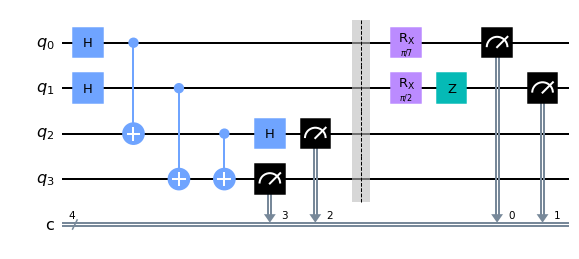

In [19]:
my_chsh_circuitsZY[5].draw(output='mpl')

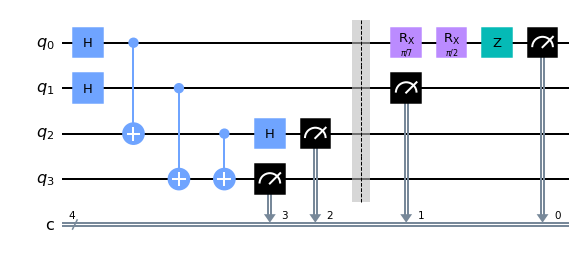

In [20]:
my_chsh_circuitsZY[6].draw(output='mpl')

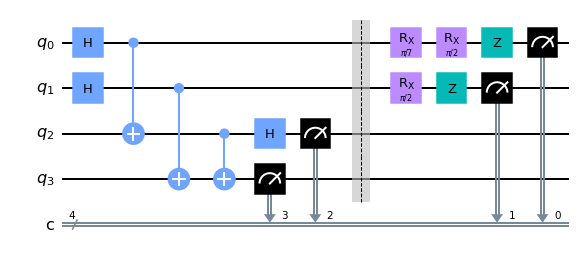

In [21]:
my_chsh_circuitsZY[7].draw(output='mpl')

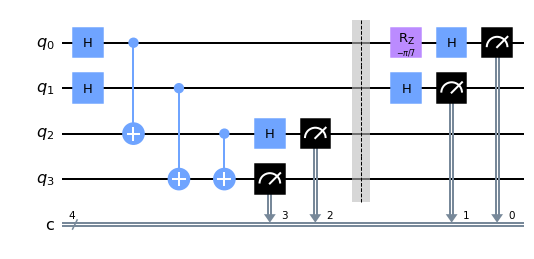

In [22]:
my_chsh_circuitsXY[4].draw(output='mpl')

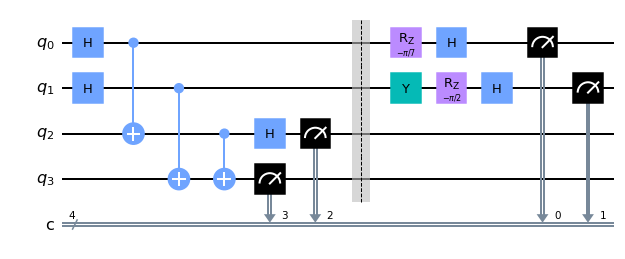

In [23]:
my_chsh_circuitsXY[5].draw(output='mpl')

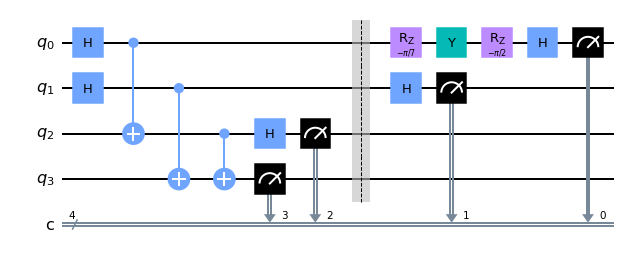

In [24]:
my_chsh_circuitsXY[6].draw(output='mpl')

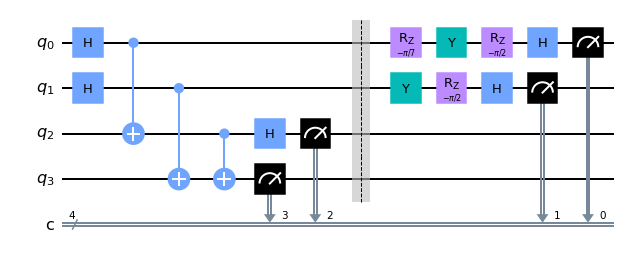

In [25]:
my_chsh_circuitsXY[7].draw(output='mpl')

In [26]:
from qiskit.tools.visualization import plot_histogram
# Execute and get counts
result_idealZX = sim.run(my_chsh_circuitsZX).result()
result_idealZY = sim.run(my_chsh_circuitsZY).result()
result_idealXY = sim.run(my_chsh_circuitsXY).result()
result_idealZX_ls=result_idealZX.get_counts()
result_idealZY_ls=result_idealZY.get_counts()
result_idealXY_ls=result_idealXY.get_counts()


In [27]:
# Bob's meausrement = (|00>+|11>)/√2 만 사용하기 위해 다른 건 삭제했어요.
# Bob의 상태가(|00>+|11>)/√2 일 때 측정하면|00**>상태로 나와요.

for item in result_idealZX_ls:
    item.pop('0100',None)
    item.pop('0101',None)
    item.pop('0110',None)
    item.pop('0111',None)
    item.pop('1000',None)
    item.pop('1001',None)
    item.pop('1010',None)
    item.pop('1011',None)
    item.pop('1100',None)
    item.pop('1101',None)
    item.pop('1110',None)
    item.pop('1111',None)
for item in result_idealZY_ls:
    item.pop('0100',None)
    item.pop('0101',None)
    item.pop('0110',None)
    item.pop('0111',None)
    item.pop('1000',None)
    item.pop('1001',None)
    item.pop('1010',None)
    item.pop('1011',None)
    item.pop('1100',None)
    item.pop('1101',None)
    item.pop('1110',None)
    item.pop('1111',None)
for item in result_idealXY_ls:
    item.pop('0100',None)
    item.pop('0101',None)
    item.pop('0110',None)
    item.pop('0111',None)
    item.pop('1000',None)
    item.pop('1001',None)
    item.pop('1010',None)
    item.pop('1011',None)
    item.pop('1100',None)
    item.pop('1101',None)
    item.pop('1110',None)
    item.pop('1111',None)

In [28]:
CHSHZX_ideal = compute_chsh_witnessZX(result_idealZX_ls)
CHSHZY_ideal = compute_chsh_witnessZY(result_idealZY_ls)
CHSHXY_ideal = compute_chsh_witnessXY(result_idealXY_ls)

Text(0, 0.5, 'CHSH witness')

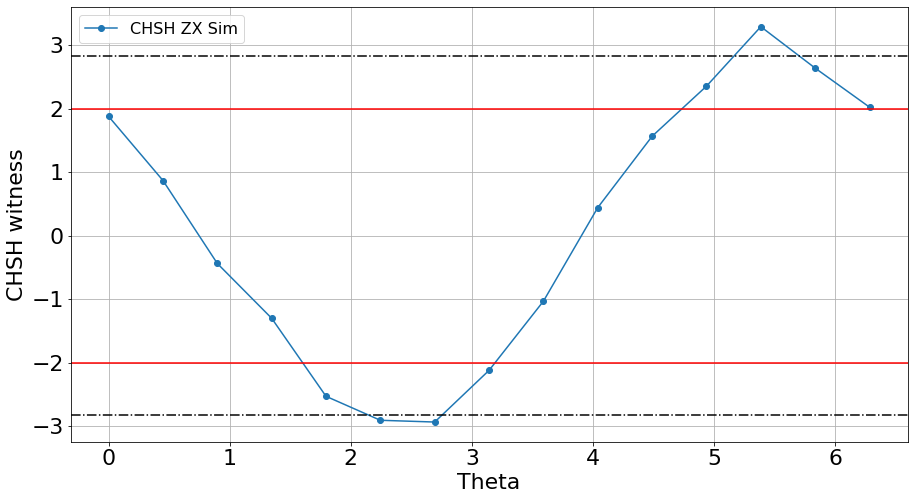

In [29]:
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 22})

plt.plot(theta_vec,CHSHZX_ideal,'o-',label = 'CHSH ZX Sim')


plt.grid(which='major',axis='both')
plt.rcParams.update({'font.size': 16})
plt.legend()
plt.axhline(y=2, color='r', linestyle='-')
plt.axhline(y=-2, color='r', linestyle='-')
plt.axhline(y=np.sqrt(2)*2, color='k', linestyle='-.')
plt.axhline(y=-np.sqrt(2)*2, color='k', linestyle='-.')
plt.xlabel('Theta')
plt.ylabel('CHSH witness')

Text(0, 0.5, 'CHSH witness')

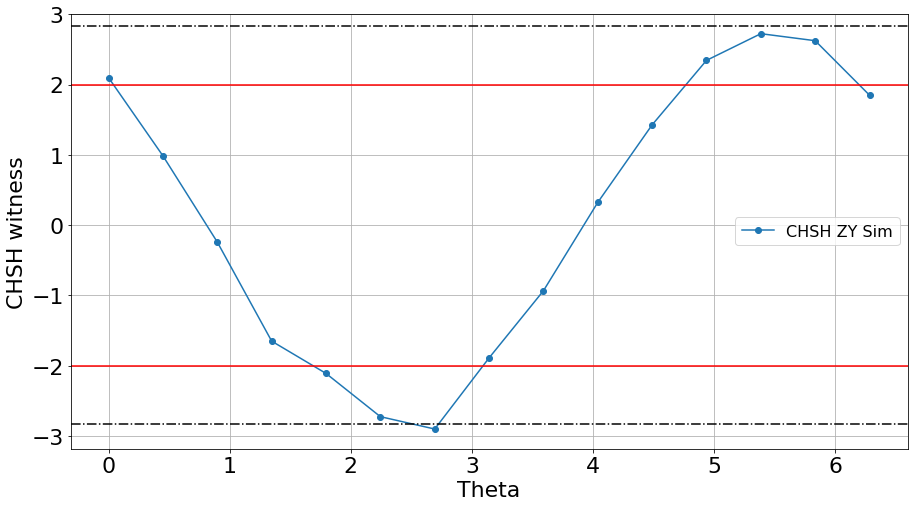

In [30]:
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 22})

plt.plot(theta_vec,CHSHZY_ideal,'o-',label = 'CHSH ZY Sim')


plt.grid(which='major',axis='both')
plt.rcParams.update({'font.size': 16})
plt.legend()
plt.axhline(y=2, color='r', linestyle='-')
plt.axhline(y=-2, color='r', linestyle='-')
plt.axhline(y=np.sqrt(2)*2, color='k', linestyle='-.')
plt.axhline(y=-np.sqrt(2)*2, color='k', linestyle='-.')
plt.xlabel('Theta')
plt.ylabel('CHSH witness')

Text(0, 0.5, 'CHSH witness')

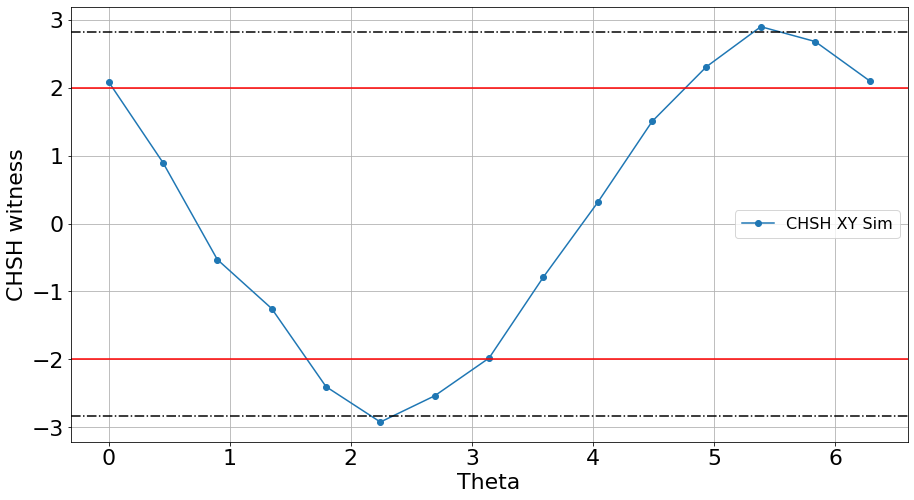

In [31]:
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 22})

plt.plot(theta_vec,CHSHXY_ideal,'o-',label = 'CHSH XY Sim')


plt.grid(which='major',axis='both')
plt.rcParams.update({'font.size': 16})
plt.legend()
plt.axhline(y=2, color='r', linestyle='-')
plt.axhline(y=-2, color='r', linestyle='-')
plt.axhline(y=np.sqrt(2)*2, color='k', linestyle='-.')
plt.axhline(y=-np.sqrt(2)*2, color='k', linestyle='-.')
plt.xlabel('Theta')
plt.ylabel('CHSH witness')

Text(0, 0.5, 'CHSH witness')

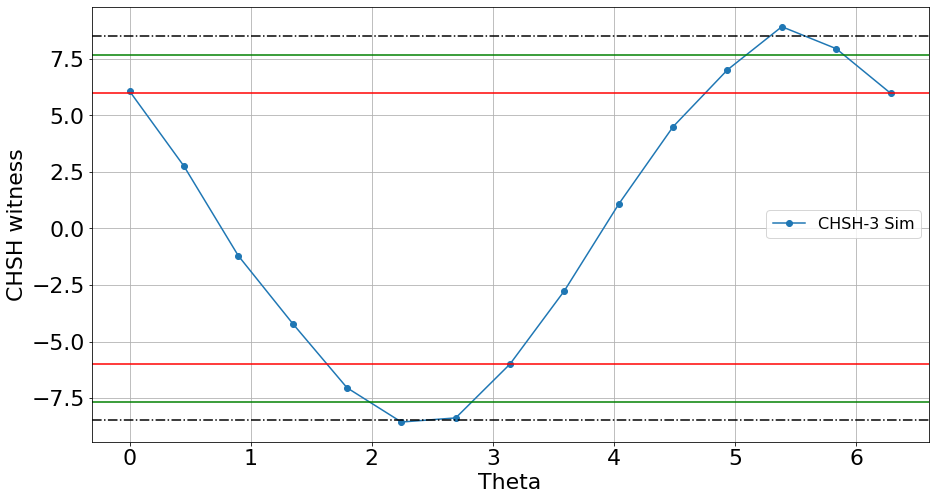

In [32]:
CHSH3_ideal=[0 for i in range(number_of_thetas)]
for i in range(number_of_thetas):
    CHSH3_ideal[i]=CHSHZX_ideal[i]+CHSHZY_ideal[i]+CHSHXY_ideal[i]
    
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 22})

plt.plot(theta_vec,CHSH3_ideal,'o-',label = 'CHSH-3 Sim')


plt.grid(which='major',axis='both')
plt.rcParams.update({'font.size': 16})
plt.legend()
plt.axhline(y=6, color='r', linestyle='-')
plt.axhline(y=-6, color='r', linestyle='-')
plt.axhline(y=7.66, color='g', linestyle='-')
plt.axhline(y=-7.66, color='g', linestyle='-')

plt.axhline(y=np.sqrt(2)*6, color='k', linestyle='-.')
plt.axhline(y=-np.sqrt(2)*6, color='k', linestyle='-.')
plt.xlabel('Theta')
plt.ylabel('CHSH witness')